# Neural Network from scratch - Mart Veldkamp

Voordat ik ga coderen wou ik nog in het kort uitleggen welk onderdeel ik zou uitwerken in een neuraal netwerk. Dit zijn de feed forward en backpropegation van een neural net.

## Backpropogation:
Backpropogation is het ‘backward propogration of errors’. 	Dit is een algoritme wat de gebruikt wordt 
om de helling van een error te bepalen, en zo hem aan te passen dat de error kleiner wordt. Het 
“backwards” staat voor het feit dat dit in een neuraal netwerk “backwards” gecalculeerd wordt. Je 
kan je voorstellen dat als je een neuraal netwerk met 5 lagen maakt, de laatste laag dan als eerst 
wordt berekent, en de eerste laag als laatst.


## Feed forward:
Feedforward netwerken, ook wel Multi-layered Netwerken genoemd. Zijn zo genoemd omdat de 
informatie alleen maar naar voren gaat in het neuraal net. Vanaf de input neuronen, naar de hidden 
neuronen en ten slot de output neuronen. Hierbij worden onder andere, weights, activatie functies 
en biases gebruikt. Om zo een neuraal netwerk te maken, een voorbeeld van een activatie functie kan
zijn: Sigmoid functie.

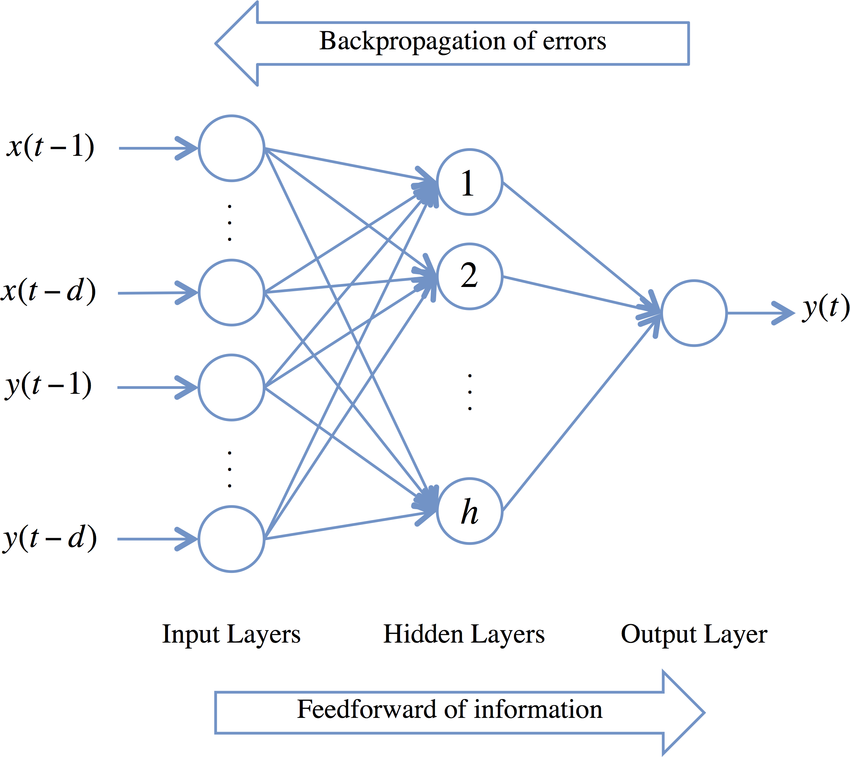

In [28]:
import numpy
import scipy.special
import matplotlib.pyplot

# Het netwerk maken

Eerst maken we een neuraal netwerk, dit doen vor volgens het stappenplan in het boek "A Neural Net from scratch". Hoe hij dit doet is als eerst een neuraal net te initaliseren, daarna te trainen en als laatst een query te geven, hieronder geef ik in het kort aan wat alle 3 de onderdelen doet:

- Initaliseren: Geeft aan hoeveel inputs, ouputs en hidden neuronen er in het neurale netwerk zitten.
- Trainen: Verbeter de weights nadat er een dataset is gegeven om van te leren. (een trainings set)
- query: Geef een logisch antwoord vanuit de output neuronen, na een input gekregen te hebben.

Als ik hier zo naar kijk zou je denken dat de sigmoid functie geschreven moet worden voor in de query functie. Verder zou je verwachten dat bij het initaliseren je aangeeft hoeveel layers/neuronen je nodig hebt. En bij het trainen verwacht is iets te moeten schrijven om het neurale net te laten backpropogaten. Om zo de errors te verkleinen. Ik zal in de vorm van lists werken.

In [29]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # zet aantal neuronen in elke input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih en who
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # Geef aan dat self.lr de learning rate is
        self.lr = learningrate
        
        # Stel in dat de activatie functie een sigmoid functie is
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
        
    # Het trainen
    def train(self, inputs_list, targets_list):
        # Verrander de list in een 2D array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # Hier bereken we het signaal naar de hidden layers.
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Hier berekenen we het signaal naar en van de uiteindelijke output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # Bereken de output en hidden errors. Hier differentiëren we dus
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # Hier updaten we de weights daadwerkelijk! WOW
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))  
        pass
       
    def query(self, inputs_list):
        # Verrander de list in een 2D array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # Hier bereken we het signaal naar de hidden layers.
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Hier berekenen we het signaal naar en van de uiteindelijke output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

## Defineer de neuronen

Hieronder geef ik aan hoeveel input, hidden en output neuronen ik zal gebruiken. Omdat ik een stappenplan volg zal ik de 3,3,3 aanhouden. Maar misschien later dit verranderen om te kijken wat voor effect dit heeft op de output. Verder stel in de learning rate in, ik hem hem nu gezet om 0.3. Maar net zoals de aantal neuronen zal ik dit ook later misschien nog aanpassen om het effect te bekijken.

In [30]:
# Hier stellen we de aantal neuronen in voor de; input, hidden en output layers.
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# Hier stel je de learning rate in
learning_rate = 0.2

# Hier maken we ons neuraal netwerk, met de input, hidden, output en learning rate.
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# Het Netwerk trainen

Wat ik hier ga doen is eigenlijk maar 2 dingen:

- Eerst ga ik een bepalen wat voor output ik nodig heb voor een gegeven dataset, en deze aanpassen in mijn code.
- Ook moet ik deze gecalculeerde output vergelijken met de daadwerkelijk (gewilde) output, om zo mijn weights aan te passen voor een verkleinde error.

Om de errors te berekenen gebruiken we de volgende formule: (Hij staat hierboven aangegeven als *hidden_errors*)

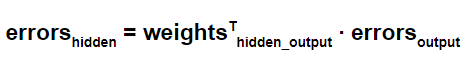

en voor de back-propagation gebruiken voor de volgende formule: (Alpha is zelf te bepalen, en ook deze code zal ik later aangeven)

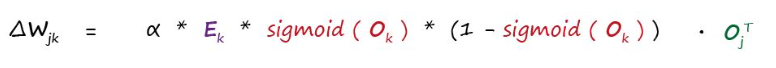

Het 2e process is eigenlijk het back propogation waar ik het eerder over had. Bij backpropgation is het belangrijk dat de functie goed werkt, om zo een verbeterd model te krijgen. Als deze functie niet werk, zal het model ook nooit beter worden. DUs het is erg belangrijk dat je dit goed maakt.

## ''train'' functie opstellen

In [31]:
def train(self, inputs_list, targets_list):

    # convert inputs list to 2d array
    inputs = numpy.array(inputs_list, ndmin=2).T
    targets = numpy.array(targets_list, ndmin=2).T

    # calculate signals into hidden layer
    hidden_inputs = numpy.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # calculate signals into final output layer
    final_inputs = numpy.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)
    pass

## Laad de mnist dataset "train" in.

In [32]:
training_data_file = open("mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

## Declareer de epochs en loop de dataset (Daadwerkelijk trainen)

In [33]:
# Hier stellen we de epochs in, epochs zijn het aantal keer dat je netwerk trained op de trainings-set
epochs = 25

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# Het netwerk testen

Nu gaan we het netwerk testen, dit doen we aan de hand van aan paar simpelle stappen, eerst hebben we een dataset nodig. Een erg simpele en veel gebruikte dataset is de mnist dataset. Deze dataset staat vol met handgeschreven getallen, en daarbij een label wat het getal moet voorstellen. Het idee is dat we ons neurale netwerk leren om af te kunnen lezen welk getal er geschreven staat zonder dat hij de label ziet. Redelijk makkelijk voor een mens, moeilijker voor een machine.

## De dataset inladen

In [34]:
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

## Het Netwerk daadwerkelijk testen

**Deze informatie is niet door mij geschreven**

In [35]:
# Dit houd bij hoeveel we goed / fout hebben gepredict
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # Hebben we het goed voorspeld? VOeg een 1 bij aan de scorecard
        scorecard.append(1)
    else:
        # Hebben we het fout voorspeld? VOeg een 0 bij aan de scorecard
        scorecard.append(0)
        pass
    
    pass

# Calculeer de accuracy

In [36]:
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.7


# Conclusie

Hoewel ik een performance van 0.7 (70%) erg slecht vind, lukt het mij niet om deze hoger te krijgen, ik heb gewerkt met verschillende maten aan epochs, verschillende maten neuronen per laag, maar niks werkt... Een mogelijke oplossing kan zijn; Verschillende type lagen toevoegen. Zoals een Recurrent layer.